# Text Classification Using LSTM

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('SPAM_text_message_Data.csv')

In [29]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


<Axes: xlabel='Category', ylabel='count'>

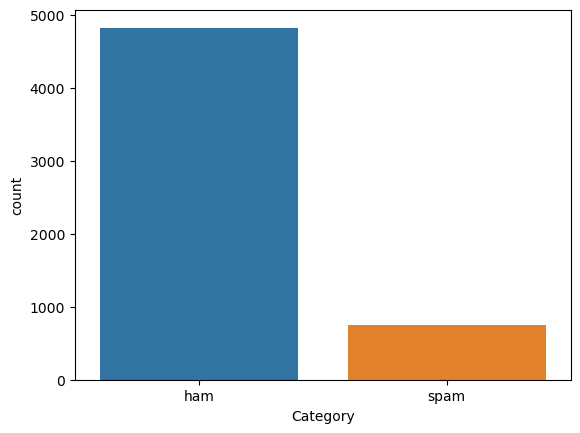

In [30]:
sns.countplot(x=df['Category'])

In [31]:
X= df['Message']
Y= df['Category']

In [32]:
# integer our label instead of replacing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)
Y

array([0, 0, 1, ..., 0, 0, 0])

In [33]:
# split our data to tarin and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size= 0.2)

In [34]:
# preprocessing, delete and lower case or etc
from tensorflow.keras.preprocessing.text import Tokenizer
max_words = 500 # vocab_size maximum words in our copus
tkn = Tokenizer(num_words= max_words)
# fit on our real data
tkn.fit_on_texts(X_train)

In [35]:
# vectorize words tfidf or other way
seq = tkn.texts_to_sequences(X_train)
print(seq)

[[201, 19, 61, 1, 174, 61], [395, 2, 103, 73, 30, 73, 55, 146, 5, 23, 20, 141], [107, 94, 2], [347, 39, 22, 376, 4, 18], [142, 64, 1, 54, 63, 441, 24, 1, 17, 16, 7, 2, 223, 23, 1, 277, 2, 303, 195, 7, 377], [3, 23, 122, 49, 39, 7, 39, 442, 29, 5, 16, 13, 125, 3, 22, 56, 3, 133, 39, 22, 219, 2, 296, 40, 9, 5, 155, 1, 196, 278], [109, 481, 2, 5], [25, 4, 362, 123, 110, 220, 9, 27, 113, 7, 9, 378, 38, 10, 7, 8, 27, 5, 48, 17, 3, 108], [1, 277, 39, 221, 156, 4, 16, 5, 202, 68], [4, 1, 28, 180, 71, 2, 409, 118, 211, 234, 136, 18, 240], [78, 4, 3, 22, 453, 2, 342, 4, 29, 14, 2, 13, 71, 5, 285, 53, 2, 37, 2, 119, 181, 136], [57, 297, 8], [330, 481, 86, 286, 426, 11, 61, 6], [58, 76, 2, 98, 343, 241, 5, 8], [140, 67, 9, 179, 114, 235, 272, 151, 8, 410, 220, 2, 29, 52], [37, 287, 288, 443, 175, 427, 97, 51, 66, 1, 154, 59, 152], [44, 203, 26, 32, 118, 44, 240, 259, 44, 15, 18, 26, 15], [39, 102, 331, 186, 73, 45, 27, 43, 9, 14], [9, 77, 16, 115, 21, 4, 241, 8, 23, 236, 129, 21, 127, 43, 6, 204,

In [36]:
#equalizaion of lenth of sentences
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_len = 100
padded_docs = pad_sequences(seq,padding= 'pre' , maxlen =max_len)

In [37]:
print(padded_docs)

[[  0   0   0 ...   1 174  61]
 [  0   0   0 ...  23  20 141]
 [  0   0   0 ... 107  94   2]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   7  98   4]
 [  0   0   0 ...  64  41  42]]


In [38]:
# end of preprocessing

In [39]:
# create model
from tensorflow.keras.models import Sequential # layer model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding

embedding_vector_feature = 30 # every vector has 30 feature
model = Sequential()
model.add(Embedding(max_words , embedding_vector_feature, input_length= max_len))
model.add(LSTM(256))
model.add(Dense(1 , activation= 'sigmoid')) # for classification to output classified hame of spam
model.compile(loss= 'binary_crossentropy' , optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 30)           15000     
                                                                 
 lstm_1 (LSTM)               (None, 256)               293888    
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 309145 (1.18 MB)
Trainable params: 309145 (1.18 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
len(padded_docs)

4457

In [41]:
len(Y_train)

4457

In [42]:
X_train

2707    S now only i took tablets . Reaction morning o...
4721    Forgot to tell ü smth.. Can ü like number the ...
4262                             Pls dont forget to study
2758                Yo we are watching a movie on netflix
616     Happy valentines day I know its early but i ha...
                              ...                        
3089    Wnevr i wana fal in luv vth my books, My bed f...
3643    My house here e sky quite dark liao... If rain...
1445                            Those ducking chinchillas
874     Ugh its been a long day. I'm exhausted. Just w...
2338    Tell your friends what you plan to do on Valen...
Name: Message, Length: 4457, dtype: object

In [43]:
Y_train

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
# fit our data on the model
model.fit(padded_docs, Y_train, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10
28/28 [==============================] - 8s 260ms/step - loss: 0.4857 - accuracy: 0.8404 - val_loss: 0.3369 - val_accuracy: 0.8879
Epoch 2/10
28/28 [==============================] - 7s 261ms/step - loss: 0.3288 - accuracy: 0.8746 - val_loss: 0.1387 - val_accuracy: 0.9496
Epoch 3/10
28/28 [==============================] - 7s 263ms/step - loss: 0.1108 - accuracy: 0.9649 - val_loss: 0.0539 - val_accuracy: 0.9888
Epoch 4/10
28/28 [==============================] - 7s 256ms/step - loss: 0.0619 - accuracy: 0.9812 - val_loss: 0.0463 - val_accuracy: 0.9899
Epoch 5/10
28/28 [==============================] - 7s 254ms/step - loss: 0.0508 - accuracy: 0.9857 - val_loss: 0.0427 - val_accuracy: 0.9899
Epoch 6/10
28/28 [==============================] - 7s 262ms/step - loss: 0.0421 - accuracy: 0.9888 - val_loss: 0.0453 - val_accuracy: 0.9888
Epoch 7/10
28/28 [==============================] - 7s 264ms/step - loss: 0.0395 - accuracy: 0.9891 - val_loss: 0.0426 - val_accuracy: 0.9910
Epoch 

In [46]:
# evaluate how model fit on the X_test
text_seq= tkn.texts_to_sequences(X_test) # vectorization of X_test
test_padded = pad_sequences(text_seq, maxlen= max_len)

In [47]:
accr = model.evaluate(test_padded, Y_test)
print(accr)

35/35 [==============================] - 2s 48ms/step - loss: 0.0866 - accuracy: 0.9767
[0.08657769858837128, 0.9766815900802612]
